In [207]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

# Reading the given image as a gray-scale image

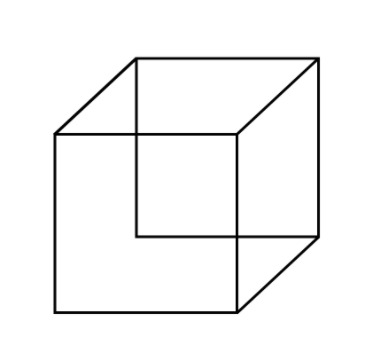

In [208]:
img = cv2.imread("/content/input.jpeg", cv2.IMREAD_GRAYSCALE) 
cv2_imshow(img)

# apply Canny edge detection

In [209]:
BW = cv2.Canny(img, 100, 200)


# Hough 

In [210]:
def hough(BW):
  'This function takes a black-white (edge detection) image as input and returns the voting matrix (H)\,theta values, and rho values.'
  height,width=BW.shape
  img_diagonal = np.ceil(np.sqrt(height**2 + width**2)) # a**2 + b**2 = c**2
  rho = np.arange(-img_diagonal, img_diagonal + 1, 1)
  theats = np.deg2rad(np.arange(-90, 90))
  rho = np.arange(-img_diagonal, img_diagonal + 1,1)
  H = np.zeros((len(rho), len(theats)))
  for y in range(height):
      for x in range(width):
            if BW[y,x] != 0:
                for k in range(len(theats)):
                  r = int((x * np.cos(theats[k]) +y * np.sin(theats[k])) + img_diagonal)
                  H[r, k] += 1
  return H,theats,rho

# voting matrix visualization

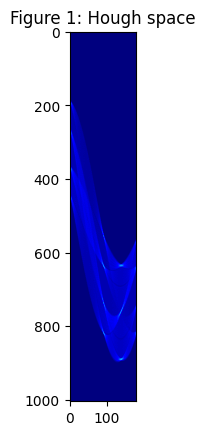

In [211]:
plt.title("Figure 1: Hough space")
H,theta,rho = hough(BW)
plt.imshow(H)
plt.set_cmap('jet')
plt.show()

# Hough Peaks

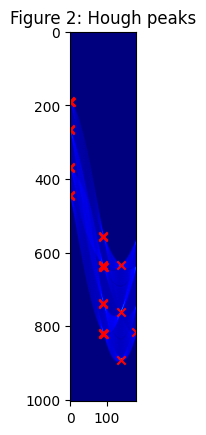

In [212]:
def houghpeaks(H, numpeaks):
    # Try to get the indecies of max peaks 
    flat_H = H.flatten()
    peaks_index = np.argsort(flat_H)[-numpeaks:]
    # try to map these indcies in 1d array into 2d array to get the theata and r for these 
    r = peaks_index // H.shape[1]#array row indices index in 2d aray
    theta = peaks_index % H.shape[1]# arrya of column index in 2d aray
    peaks = np.column_stack((r, theta))# array of tuples with size numofpeaks * 2 each tuple cotain crossponding r , theta value for this index 
    return peaks

peaks = houghpeaks(H, 24)
plt.scatter(peaks[:, 1], peaks[:, 0], marker='x', color='red')
plt.imshow(H, cmap='jet')
plt.title("Figure 2: Hough peaks")

plt.show()

# Hough Lines

In [213]:
def houghlines(BW,theta,rho,peaks):
  lines=[]
  for i in peaks:
      r= rho[i[0]]
      thetaa = theta[i[1]]
      a = np.cos(thetaa)
      b = np.sin(thetaa)
      x0 = a*r
      y0 = b*r
      x1 = int(x0 + 1000*(-b))
      y1 = int(y0 + 1000*(a))
      x2 = int(x0 - 1000*(-b))
      y2 = int(y0 - 1000*(a))
      lines.append(((x1, y1), (x2, y2)))
  return lines

In [214]:
lines = houghlines(BW,theta,rho,peaks)


# Lines Visualization

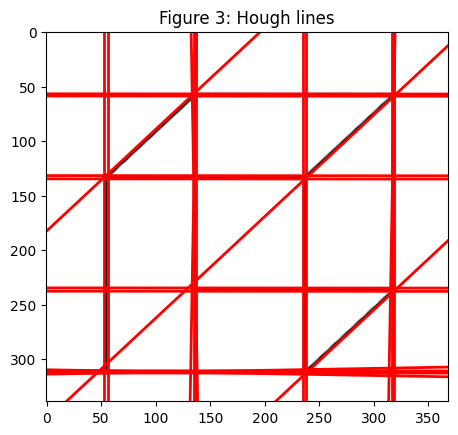

In [215]:
def houghlines_draw(img, lines):
    for line in lines:
        plt.plot([line[0][0],line[1][0]], [line[0][1],line[1][1]], color='red', linewidth=2)
houghlines_draw(img, lines)
plt.title("Figure 3: Hough lines")

plt.imshow(img)
plt.set_cmap('gray')
plt.show()
